In [3]:
import sklearn as sk
import numpy as np
import pandas as pd

In [4]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/DATASETS/Iris (1).csv')

In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [8]:
X = df.drop(['Id', 'Species'], axis=1)
y = df['Species']

y_encoded = le.fit_transform(y)
y = y_encoded

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X = X_scaled

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)


In [15]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors=5
knn_model = KNeighborsClassifier(n_neighbors=5)


knn_model.fit(X_train, y_train)


KNeighborsClassifier()

In [17]:
y_pred = knn_model.predict(X_test)

print("Predictions made successfully.")
print(f"First 5 predictions: {y_pred[:5]}")
print(f"Actual first 5 test labels: {y_test[:5]}")

Predictions made successfully.
First 5 predictions: [1 0 2 1 1]
Actual first 5 test labels: [1 0 2 1 1]


In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Accuracy for k=1: 0.9667
Accuracy for k=2: 1.0000
Accuracy for k=3: 1.0000
Accuracy for k=4: 1.0000
Accuracy for k=5: 1.0000
Accuracy for k=6: 1.0000
Accuracy for k=7: 1.0000
Accuracy for k=8: 1.0000
Accuracy for k=9: 1.0000
Accuracy for k=10: 1.0000
Accuracy for k=11: 1.0000
Accuracy for k=12: 1.0000
Accuracy for k=13: 1.0000
Accuracy for k=14: 1.0000
Accuracy for k=15: 1.0000
Accuracy for k=16: 1.0000
Accuracy for k=17: 1.0000
Accuracy for k=18: 0.9667
Accuracy for k=19: 0.9667
Accuracy for k=20: 0.9667


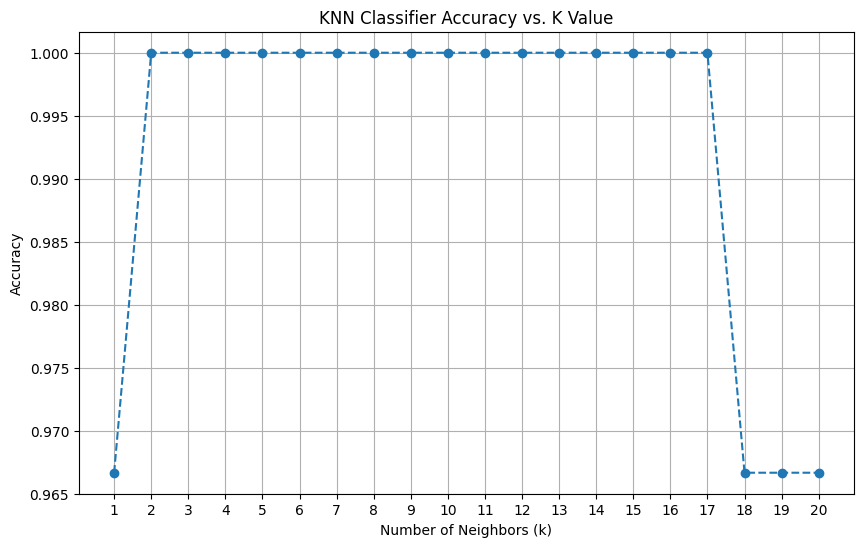


Best k value: 2 with accuracy: 1.0000


In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

k_values = list(range(1, 21))
accuracies = []

for k in k_values:

    knn_model_k = KNeighborsClassifier(n_neighbors=k)


    knn_model_k.fit(X_train, y_train)

    y_pred_k = knn_model_k.predict(X_test)


    accuracy_k = accuracy_score(y_test, y_pred_k)
    accuracies.append(accuracy_k)

    print(f"Accuracy for k={k}: {accuracy_k:.4f}")


plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='--')
plt.title('KNN Classifier Accuracy vs. K Value')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()


best_k = k_values[accuracies.index(max(accuracies))]
best_accuracy = max(accuracies)
print(f"\nBest k value: {best_k} with accuracy: {best_accuracy:.4f}")